In [1]:
import MulensModel as mm
from MulensModel.utils import Utils
import numpy as np
import mcmcFit as mcfit
import matplotlib.pyplot as pl

In [4]:

from glob import glob
im_dir = '/Users/adrianhernandez/JPL_2021/ukirt_psf/'
ukirt_file = glob(f"{im_dir}/*P71224*.txt")
print(ukirt_file[0]) #change indicies to update the file you are interested 
filename = ukirt_file[2][44:64]
ukirt_data_H = np.loadtxt(ukirt_file[0], usecols=range(3))
ukirt_data_K = np.loadtxt(ukirt_file[2], usecols=range(3))
H_data = mm.MulensData(file_name=ukirt_file[0])
K_data = mm.MulensData(file_name=ukirt_file[2])
print(filename)

data = np.concatenate((ukirt_data_H,ukirt_data_K))
print(len(data))

/Users/adrianhernandez/JPL_2021/ukirt_psf/UK2019_c2_4_4_K_P71224.txt
2019_c2_4_4_H_P71224
645


In [43]:
# ***Set time range of planetary perturbation (including 2450000).***
(t_planet_start, t_planet_stop) = (2458660.,2458690.)

# ***Set time range of planetary perturbation (including 2450000).***

# *Set the magnification methods for the planet model*
# VBBL method will be used between t_planet_start and t_planet_stop, 
# and point_source_point_lens will be used everywhere else.
magnification_methods = [0, 'point_source_point_lens', 
    t_planet_start, 'VBBL', t_planet_stop, 
    'point_source_point_lens', 2459000.]

chi2: 3761.613659956812


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/MulensModel-1.17.15-py3.8-macosx-10.9-x86_64.egg/MulensModel/model.py:453: FutureWarning: Keyword "color_list" is deprecated. Use MulensData.plot_properties instead.
  warnings.warn('Keyword "' + old_keyword + '" is deprecated.' +
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/MulensModel-1.17.15-py3.8-macosx-10.9-x86_64.egg/MulensModel/model.py:453: FutureWarning: Keyword "marker_list" is deprecated. Use MulensData.plot_properties instead.
  warnings.warn('Keyword "' + old_keyword + '" is deprecated.' +
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/MulensModel-1.17.15-py3.8-macosx-10.9-x86_64.egg/MulensModel/model.py:453: FutureWarning: Keyword "label_list" is deprecated. Use MulensData.plot_properties instead.
  warnings.warn('Keyword "' + old_keyword + '" is deprecated.' +


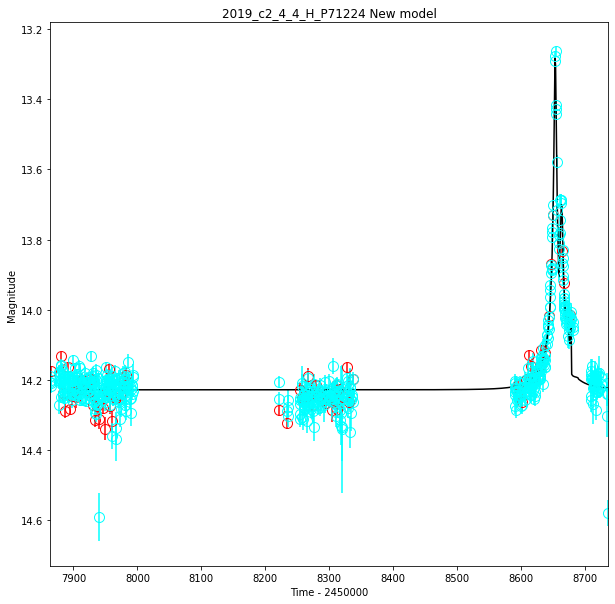

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/MulensModel-1.17.15-py3.8-macosx-10.9-x86_64.egg/MulensModel/model.py:453: FutureWarning: Keyword "color_list" is deprecated. Use MulensData.plot_properties instead.
  warnings.warn('Keyword "' + old_keyword + '" is deprecated.' +
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/MulensModel-1.17.15-py3.8-macosx-10.9-x86_64.egg/MulensModel/model.py:453: FutureWarning: Keyword "marker_list" is deprecated. Use MulensData.plot_properties instead.
  warnings.warn('Keyword "' + old_keyword + '" is deprecated.' +
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/MulensModel-1.17.15-py3.8-macosx-10.9-x86_64.egg/MulensModel/model.py:453: FutureWarning: Keyword "label_list" is deprecated. Use MulensData.plot_properties instead.
  warnings.warn('Keyword "' + old_keyword + '" is deprecated.' +


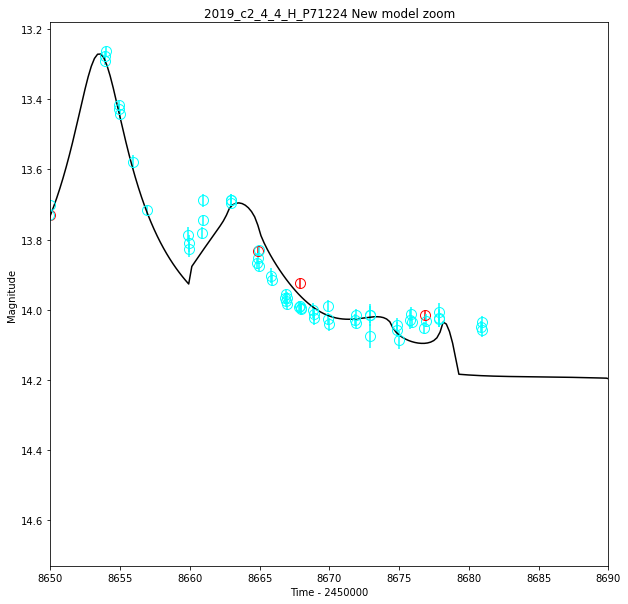

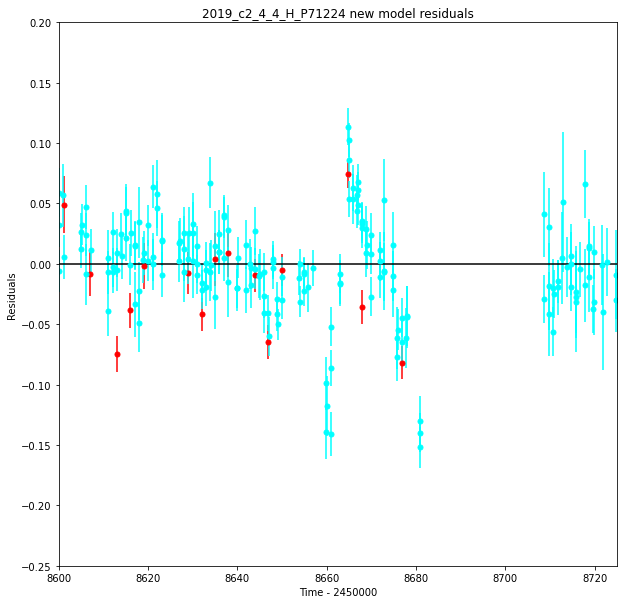

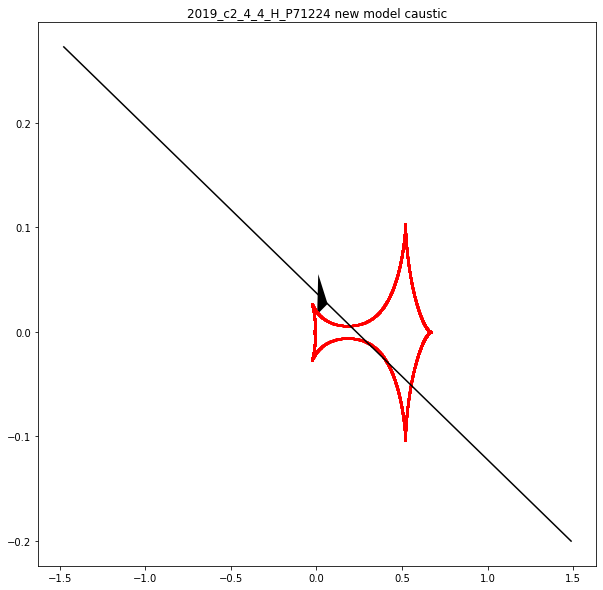

In [46]:
# Define the model
model_1 = mm.Model({
    't_0': 2458653.5, 
    'u_0': 0.036777,
    't_E': 45.5,
    'rho': 0.01057  ,
    's':  1.29392, #effects the shape of the causitc # previous guess 1.06086
    'q': 0.01230384 ,
    'alpha': -9.07446})
model_1.set_magnification_methods(magnification_methods)
model_1_event = mm.Event(datasets=[H_data,K_data], model= model_1)

print('chi2: {0}'.format(mixed_event.get_chi2()))

# Plot the model light curve
pl.figure(figsize=(10,10))
model_1_event.plot_data(subtract_2450000=True, color_list=['cyan', 'red'],label_list= ['H_band','K_band'],  s=10,marker_list = 'o',markerfacecolor='none')
model_1_event.plot_model(t_range=[2457900,2458800], subtract_2450000=True, color='black')
#pl.xlim(8600,8800)
pl.title(filename + ' New model')
pl.savefig(filename + '_new_model', dpi=100)
pl.show()

pl.figure(figsize=(10,10))
model_1_event.plot_data(subtract_2450000=True, color_list=['cyan', 'red'],label_list= ['H_band','K_band'],  s=10,marker_list = 'o',markerfacecolor='none')
model_1_event.plot_model(t_range=[2458575,2458800], subtract_2450000=True, color='black')
pl.xlim(8650,8690)
pl.title(filename + ' New model zoom')
pl.savefig(filename + '_new_model_zoom', dpi=100)
pl.show

pl.figure(figsize=(10,10))
model_1_event.plot_residuals(show_errorbars=True,subtract_2450000=True)
pl.title(filename + ' new model residuals')
pl.xlim(8600,8725)
pl.ylim(-.25,.2)
pl.savefig(filename + '_new_model_res', dpi=100)
pl.show()

#Plot the trajectory of the source relative to the caustics
pl.figure(figsize=(10,10))
model_1_event.model.plot_trajectory(color='black', caustics=True)
#pl.xlim(-.1,.25)
#pl.ylim(-.2,.2)
pl.title(filename + ' new model caustic')
#pl.savefig(filename + '_new_model_caustic', dpi=100)
pl.show()

  chi2      s       q   alpha     rho     t_0     u_0     t_E
919.41 1.2885 0.01202   -8.58 deg 0.01067 2458653.30759    0.03 51.46793
910.62 1.2885 0.01259   -8.93 deg 0.01125 2458653.35619    0.03 51.43101
906.95 1.2885 0.01318   -9.26 deg 0.01181 2458653.39702    0.03 51.42589
907.31 1.2885 0.01380   -9.58 deg 0.01245 2458653.43306    0.03 51.43127
910.94 1.2885 0.01445   -9.87 deg 0.01313 2458653.46269    0.03 51.45131
915.43 1.2974 0.01318   -8.66 deg 0.01130 2458653.31332    0.03 50.08838
907.26 1.2974 0.01380   -9.02 deg 0.01197 2458653.36124    0.03 50.07879
904.01 1.2974 0.01445   -9.36 deg 0.01262 2458653.40177    0.03 50.10212
904.58 1.2974 0.01514   -9.66 deg 0.01330 2458653.43637    0.03 50.11637
908.19 1.2974 0.01585   -9.95 deg 0.01403 2458653.46439    0.03 50.14818
904.39 1.3064 0.01514   -9.13 deg 0.01275 2458653.36737    0.03 48.80860
901.56 1.3064 0.01585   -9.46 deg 0.01350 2458653.40611    0.03 48.84410
902.34 1.3064 0.01660   -9.76 deg 0.01422 2458653.43906    0.03 48.87552
905.98 1.3064 0.01738  -10.04 deg 0.01497 2458653.46624    0.04 48.92236
901.93 1.3155 0.01660   -9.25 deg 0.01361 2458653.37502    0.03 47.61889
899.52 1.3155 0.01738   -9.56 deg 0.01440 2458653.41307    0.04 47.65247
900.54 1.3155 0.01820   -9.86 deg 0.01521 2458653.44306    0.04 47.71569